In [1]:
# import librosa
# songname = "./genres/blues/blues.00000.wav"

In [2]:
# import matplotlib.pyplot as plt

# cmap = plt.get_cmap('inferno')
# plt.figure(figsize=(10,10))

# y, sr = librosa.load(songname, mono=True, duration=5)
# plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
# plt.axis('off');
# plt.savefig('./blues.00000.wav.png')
# plt.clf()

In [3]:
# # 第一 將每一種歌曲型態轉換成Spectrogram
# # 第二 參考CNN MODEL去進行分類
# img = plt.imread('./blues.00000.wav.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

In [4]:
# import pandas as pd
# path = './genres/'
# df = pd.read_csv(path + 'input.mf', delimiter ='\t', header=None, names=['fullpath', 'style'])
# df['filename'] = df[:]['fullpath'].apply(lambda x: path+'/'.join(x.split('/')[-2:]))
# df[:5]

In [5]:
# df['filename'][:3].tolist()

In [6]:
# from tqdm import tqdm
# for songname in tqdm(df['filename'][:].tolist()):
#     cmap = plt.get_cmap('inferno')
#     plt.figure(figsize=(10,10))
#     y, sr = librosa.load(songname, mono=True, duration=5)
#     plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
#     plt.axis('off');
#     plt.savefig('./CNN/{}.png'.format(songname.split('/')[-1]))
#     plt.clf()
#     plt.close()

In [7]:
# path = './CNN/'
# X = []
# import os
# for root, dirs, files in os.walk(path):
#     for f in files:
#         X.append(root + f)

# X[:3]

In [8]:
# len(X)

In [9]:
# sorted(X)[:3]

In [10]:
# X = sorted(X)

In [11]:
import pandas as pd
sample = pd.read_csv('data.csv')
# sample[:3]

In [12]:
# y 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_raw = sample.iloc[:, -1].values
y = le.fit_transform(y_raw)
y[:3]

array([0, 0, 0])

In [13]:
# import matplotlib.pyplot as plt
# from skimage import color
# import numpy as np

# path = './CNN/'

# def read_image(f):
#     img = plt.imread(fname=f)
#     img_gray = color.rgb2gray(color.rgba2rgb(img))
#     return(img_gray)

# X = np.array([read_image(x) for x in X[:] ])        
# X.shape

In [14]:
# np.save('./X.npy', X)

In [15]:
import numpy as np
X = np.load('./X.npy')
X.shape

(1000, 720, 720)

In [16]:
# https://stackoverflow.com/questions/47645115/oserror-cannot-identify-image-file-dataset-ds-store

In [17]:
# 分割數據
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
import keras
from keras.utils  import np_utils
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Activation #神經層
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [19]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Conv2D(filters=12, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=(720, 720, 1))) # 高 寬 RGB
model.add(MaxPooling2D(pool_size=(2, 2)))  # kernel_size=(2, 2)
model.add(Flatten())                       # fully-connected layer

# model.add(Dense(units=256, kernel_initializer='normal', activation='relu'))             # input + hidder layer
# model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))  # hidder layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))# Add output layer

# 編譯: 選擇損失函數、優化方法及成效衡量方式
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 720, 720, 12)      120       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 360, 360, 12)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1555200)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                99532864  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 99,533,634
Trainable params: 99,533,634
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 將 training 的 label 進行 one-hot encoding，例如數字 1 經過 One-hot encoding 轉換後是 01
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(X_train.shape[0], 720, 720, 1).astype('float32')  # 自己試試看float64
X_test_2D  = X_test.reshape(X_test.shape[0], 720, 720, 1).astype('float32')  # 自己試試看float64


X_train_norm = X_train_2D  # 將訊號 0- 255 轉換成 0-1.0
X_test_norm = X_test_2D  # 將訊號 0- 255 轉換成 0-1.0

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=X_train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50,      # <-------------------------------------調整
                          batch_size=5,   # 21765
                          verbose=2)       # 0 1 2

print('Completed!!')

Epoch 1/50
128/128 - 9s - loss: 2.7081 - accuracy: 0.0766 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/50
128/128 - 5s - loss: 2.3026 - accuracy: 0.0891 - val_loss: 2.3027 - val_accuracy: 0.0938
Epoch 3/50
128/128 - 5s - loss: 2.3026 - accuracy: 0.1125 - val_loss: 2.3028 - val_accuracy: 0.0938
Epoch 4/50
128/128 - 5s - loss: 2.3025 - accuracy: 0.0891 - val_loss: 2.3029 - val_accuracy: 0.0938
Epoch 5/50
128/128 - 5s - loss: 2.3025 - accuracy: 0.1125 - val_loss: 2.3030 - val_accuracy: 0.0938
Epoch 6/50
128/128 - 5s - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3030 - val_accuracy: 0.0938
Epoch 7/50
128/128 - 5s - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3031 - val_accuracy: 0.0938
Epoch 8/50
128/128 - 5s - loss: 2.3024 - accuracy: 0.1000 - val_loss: 2.3032 - val_accuracy: 0.0938
Epoch 9/50
128/128 - 5s - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3032 - val_accuracy: 0.0938
Epoch 10/50
128/128 - 5s - loss: 2.3023 - accuracy: 0.1125 - val_loss: 2.3033 - val_accuracy: 0.0938

In [21]:
# ############################## <--- exam
# 根據 test 數據顯示訓練成果(分數)
# ############################## <--- exam
scores = model.evaluate(X_test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

ResourceExhaustedError:  OOM when allocating tensor with shape[32,12,720,720] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-21-9d58a521c6ae>:4) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_17576]

Function call stack:
test_function


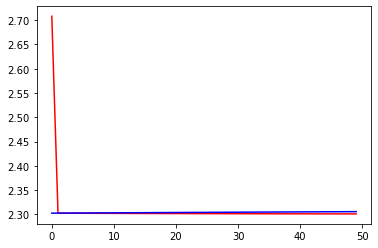

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

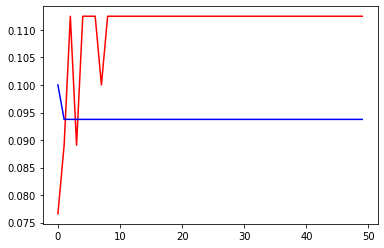

In [24]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()